In [3]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("TSP Matrix.csv", header=None)
df.columns = ['x', 'y']

In [5]:
df.head()

,x,y
0,2.7933,3.6940
1,2.6067,4.4254
2,2.8600,5.0373
3,2.5400,6.2463
4,3.1267,6.4701


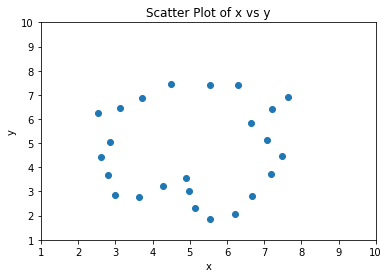

In [6]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.title('Scatter Plot of x vs y')
plt.show()

In [7]:
# To calculate the distance between each city
def calculate_distance_matrix(df):
    num_cities = len(df)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            x1, y1 = df.iloc[i]
            x2, y2 = df.iloc[j]
            distance_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance_matrix

# To run the class to make a matrix
distance_matrix = calculate_distance_matrix(df)

# To display the matrix.
distance_matrix_df = pd.DataFrame(distance_matrix)
distance_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.754828,1.344955,2.564838,2.796048,3.327688,4.111249,4.641222,5.098828,5.815422,...,4.386726,3.988462,3.787718,3.295457,2.722923,2.279243,2.098710,1.550642,1.260858,0.873894
1,0.754828,0.000000,0.662256,1.822121,2.109786,2.705419,3.553030,4.205051,4.739405,5.610638,...,4.629071,4.381416,4.311853,3.888250,3.294177,2.753187,2.444147,2.050227,1.961756,1.628650
2,1.344955,0.662256,0.000000,1.250632,1.457410,2.043680,2.901820,3.599568,4.170696,5.130404,...,4.519600,4.418469,4.484554,4.146633,3.543632,2.925453,2.516956,2.293262,2.410979,2.198046
3,2.564838,1.822121,1.250632,0.000000,0.627936,1.349135,2.283698,3.235777,3.931699,5.137388,...,5.288430,5.373747,5.570921,5.303289,4.703334,4.047060,3.578422,3.477723,3.659721,3.433058
4,2.796048,2.109786,1.457410,0.627936,0.000000,0.731248,1.670595,2.607870,3.305480,4.528793,...,4.904377,5.092699,5.385559,5.191958,4.604296,3.921122,3.413939,3.435770,3.750770,3.629253


In [8]:
# Function to calculate the cost of a tour
def cost_of_tour(tour, distance_matrix):
    total_cost = 0
    for i in range(len(tour) - 1):
        total_cost += distance_matrix[tour[i], tour[i+1]]
    # Add the distance to return to the starting point
    total_cost += distance_matrix[tour[-1], tour[0]]
    return total_cost

In [9]:
# Generate a random initial solution (random tour)
def generate_initial_solution(num_cities):
    solution = list(range(num_cities))
    random.shuffle(solution)
    return solution

In [10]:
# Function to get the best neighbor by swapping two cities
def get_best_neighbour(tour, distance_matrix, tabu_list, tabu_limit, aspiration):
    best_neighbour = None
    best_neighbour_cost = math.inf
    
    for i in range(len(tour)):
        for j in range(i + 1, len(tour)):
            # Swap two cities
            new_tour = tour.copy()
            new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
            new_cost = cost_of_tour(new_tour, distance_matrix)
            
            # If the new solution is in the tabu list, check aspiration criteria
            if tuple(new_tour) in tabu_list:
                if tabu_list[tuple(new_tour)] > aspiration:
                    continue
            
            # Check if the new neighbor is the best so far
            if new_cost < best_neighbour_cost:
                best_neighbour = new_tour
                best_neighbour_cost = new_cost
                tabu_list[tuple(best_neighbour)] = tabu_limit  # Add to tabu list with the limit
    
    return best_neighbour, best_neighbour_cost

In [11]:
# Tabu Search Algorithm
def tabu_search(distance_matrix, num_iterations, tabu_limit, aspiration, max_tabu_size=10):
    num_cities = len(distance_matrix)
    
    # Step 1: Generate an initial random solution
    current_solution = generate_initial_solution(num_cities)
    current_cost = cost_of_tour(current_solution, distance_matrix)
    
    # Initialize the best solution and its cost
    best_solution = current_solution.copy()
    best_cost = current_cost
    
    # Tabu list to keep track of solutions to avoid
    tabu_list = {}
    cost_history = [current_cost]
    
    for _ in range(num_iterations):
        # Decrease tabu tenure for all entries
        for tabu in list(tabu_list.keys()):
            tabu_list[tabu] -= 1
            if tabu_list[tabu] <= 0:
                del tabu_list[tabu]  # Remove expired tabu entries
        
        # Get the best neighboring solution that is not in the tabu list
        new_solution, new_cost = get_best_neighbour(current_solution, distance_matrix, tabu_list, tabu_limit, aspiration)
        
        # Update current solution
        current_solution = new_solution
        current_cost = new_cost
        
        # Update the best solution if the new solution is better
        if current_cost < best_cost:
            best_solution = current_solution.copy()
            best_cost = current_cost
        
        # Keep track of the cost for plotting
        cost_history.append(current_cost)
        
        # Trim the tabu list if it exceeds the max size
        if len(tabu_list) > max_tabu_size:
            tabu_list.pop(next(iter(tabu_list)))
    
    return best_solution, best_cost, cost_history


In [21]:
# Parameters for the Tabu Search algorithm
num_iterations = 500
tabu_limit = 5
aspiration = 2
num_runs = 10  # Run Tabu Search 10 times

In [22]:
# Store all results for plotting
all_costs = []
best_solutions = []
best_costs = []

In [23]:
# Run Tabu Search `num_runs` times
for run in range(num_runs):
    best_solution, best_cost, cost_history = tabu_search(distance_matrix, num_iterations, tabu_limit, aspiration)
    all_costs.append(cost_history)
    best_solutions.append(best_solution)
    best_costs.append(best_cost)
    print(f"Run {run+1}: Best cost (total distance): {best_cost}")

Run 1: Best cost (total distance): 19.555012927378094
Run 2: Best cost (total distance): 31.764439454824366
Run 3: Best cost (total distance): 29.636762643207476
Run 4: Best cost (total distance): 19.5550129273781
Run 5: Best cost (total distance): 27.39700200778756
Run 6: Best cost (total distance): 19.555012927378097
Run 7: Best cost (total distance): 19.555012927378094
Run 8: Best cost (total distance): 32.09110527181322
Run 9: Best cost (total distance): 19.555012927378094
Run 10: Best cost (total distance): 27.41470002127749


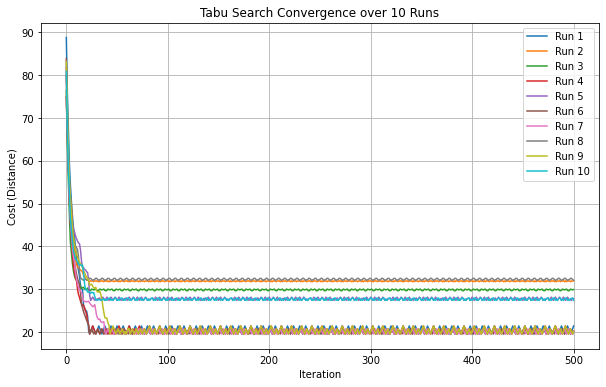

In [24]:
# Plot the convergence of costs over iterations for all runs
plt.figure(figsize=(10, 6))
for i, costs in enumerate(all_costs):
    plt.plot(costs, label=f'Run {i+1}')

plt.xlabel('Iteration')
plt.ylabel('Cost (Distance)')
plt.title('Tabu Search Convergence over 10 Runs')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Print the best solutions and their respective costs
print("Best solutions and costs for all runs:")
for i in range(num_runs):
    print(f"Run {i+1}: Best Solution: {best_solutions[i]}, Best Cost: {best_costs[i]}")

Best solutions and costs for all runs:
Run 1: Best Solution: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1], Best Cost: 19.555012927378094
Run 2: Best Solution: [8, 9, 10, 12, 13, 14, 15, 6, 5, 4, 3, 2, 1, 19, 16, 17, 18, 22, 23, 0, 21, 20, 11, 7], Best Cost: 31.764439454824366
Run 3: Best Solution: [5, 0, 23, 22, 19, 18, 17, 16, 15, 14, 20, 21, 1, 2, 3, 4, 11, 12, 13, 10, 9, 8, 7, 6], Best Cost: 29.636762643207476
Run 4: Best Solution: [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14], Best Cost: 19.5550129273781
Run 5: Best Solution: [4, 5, 6, 7, 19, 18, 17, 16, 15, 14, 13, 10, 9, 8, 11, 12, 20, 21, 22, 23, 0, 1, 2, 3], Best Cost: 27.39700200778756
Run 6: Best Solution: [18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], Best Cost: 19.555012927378097
Run 7: Best Solution: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], Best Cost: 19.